In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temp-annual-min/TEMP_ANNUAL_MIN_1901-2021 A.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Temp_df = pd.read_csv("/kaggle/input/temp-annual-min/TEMP_ANNUAL_MIN_1901-2021 A.csv")

In [4]:
Temp_df.head(5)

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  14.46  15.76  19.02  22.45  24.50  25.26  24.64  24.17  23.22  21.48   
1  1902  14.06  15.17  19.69  22.72  24.88  25.05  24.47  24.20  23.24  20.44   
2  1903  13.74  14.87  17.94  21.82  24.22  25.02  24.89  23.92  23.62  21.31   
3  1904  13.75  14.23  18.67  22.55  24.17  24.71  24.00  23.91  22.85  20.77   
4  1905  13.05  12.91  17.78  20.65  24.58  25.37  24.60  24.41  23.49  21.52   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  17.42  14.28   20.55    15.11    21.99    24.32    17.73  
1  17.12  14.35   20.45    14.61    22.43    24.24    17.31  
2  16.66  13.50   20.13    14.30    21.33    24.37    17.16  
3  16.57  14.53   20.06    13.99    21.80    23.87    17.29  
4  17.67  14.10   20.01    12.98    21.00    24.47    17.76

In [5]:
Temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     121 non-null    int64  
 1   JAN      121 non-null    float64
 2   FEB      121 non-null    float64
 3   MAR      121 non-null    float64
 4   APR      121 non-null    float64
 5   MAY      121 non-null    float64
 6   JUN      121 non-null    float64
 7   JUL      121 non-null    float64
 8   AUG      121 non-null    float64
 9   SEP      121 non-null    float64
 10  OCT      121 non-null    float64
 11  NOV      121 non-null    float64
 12  DEC      121 non-null    float64
 13  ANNUAL   121 non-null    float64
 14  JAN-FEB  121 non-null    float64
 15  MAR-MAY  121 non-null    float64
 16  JUN-SEP  121 non-null    float64
 17  OCT-DEC  121 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 17.1 KB


In [6]:
Temp_df.shape

(121, 18)

In [7]:
Temp_df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [8]:
Temp_df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [9]:
Temp_df.dtypes

YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object

In [10]:
# Data Cleaning and Preprocessing
Temp_df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']] = Temp_df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']].apply(pd.to_numeric, errors='coerce')
print(Temp_df)

     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  14.46  15.76  19.02  22.45  24.50  25.26  24.64  24.17  23.22   
1    1902  14.06  15.17  19.69  22.72  24.88  25.05  24.47  24.20  23.24   
2    1903  13.74  14.87  17.94  21.82  24.22  25.02  24.89  23.92  23.62   
3    1904  13.75  14.23  18.67  22.55  24.17  24.71  24.00  23.91  22.85   
4    1905  13.05  12.91  17.78  20.65  24.58  25.37  24.60  24.41  23.49   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
116  2017  14.02  16.13  19.02  23.01  24.84  24.88  24.57  24.35  23.83   
117  2018  13.39  16.14  19.58  22.59  24.46  25.12  24.67  24.23  23.35   
118  2019  13.37  15.88  18.75  22.89  24.74  25.45  24.91  24.37  23.89   
119  2020  14.30  15.82  19.06  22.36  24.45  24.81  24.77  24.73  24.08   
120  2021  14.78  16.01  19.95  22.33  24.17  24.81  24.88  24.39  24.06   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    21.48  17.4

In [11]:
monthly_avg_temp = Temp_df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
print(monthly_avg_temp)

JAN    13.636364
FEB    15.307273
MAR    18.685702
APR    22.162231
MAY    24.394050
JUN    24.836033
JUL    24.342562
AUG    23.979917
SEP    23.213554
OCT    20.881736
NOV    17.167273
DEC    14.245950
dtype: float64


In [12]:
# Convert YEAR column to datetime format
Temp_df['YEAR'] = pd.to_datetime(Temp_df['YEAR'], format='%Y')

In [13]:
# Extract month and year from datetime column
Temp_df['MONTH'] = Temp_df['YEAR'].dt.month
Temp_df['YEAR'] = Temp_df['YEAR'].dt.year

In [14]:
# Pivot monthly columns
Temp_df_pivot = Temp_df.pivot(index='YEAR', columns='MONTH', values=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
print(Temp_df_pivot)

         JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
MONTH      1      1      1      1      1      1      1      1      1      1   
YEAR                                                                          
1901   14.46  15.76  19.02  22.45  24.50  25.26  24.64  24.17  23.22  21.48   
1902   14.06  15.17  19.69  22.72  24.88  25.05  24.47  24.20  23.24  20.44   
1903   13.74  14.87  17.94  21.82  24.22  25.02  24.89  23.92  23.62  21.31   
1904   13.75  14.23  18.67  22.55  24.17  24.71  24.00  23.91  22.85  20.77   
1905   13.05  12.91  17.78  20.65  24.58  25.37  24.60  24.41  23.49  21.52   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2017   14.02  16.13  19.02  23.01  24.84  24.88  24.57  24.35  23.83  21.84   
2018   13.39  16.14  19.58  22.59  24.46  25.12  24.67  24.23  23.35  20.83   
2019   13.37  15.88  18.75  22.89  24.74  25.45  24.91  24.37  23.89  21.62   
2020   14.30  15.82  19.06  22.36  24.45  24.81  24.

In [15]:
# Data Analysis
# Calculate average temperature for each month
monthly_avg_temp = Temp_df_pivot.mean()
print(monthly_avg_temp)

     MONTH
JAN  1        13.636364
FEB  1        15.307273
MAR  1        18.685702
APR  1        22.162231
MAY  1        24.394050
JUN  1        24.836033
JUL  1        24.342562
AUG  1        23.979917
SEP  1        23.213554
OCT  1        20.881736
NOV  1        17.167273
DEC  1        14.245950
dtype: float64


In [16]:
# Calculate average temperature for each year
annual_avg_temp = Temp_df_pivot.mean(axis=1)
print(annual_avg_temp)

YEAR
1901    20.555000
1902    20.449167
1903    20.125833
1904    20.059167
1905    20.010833
          ...    
2017    20.764167
2018    20.567500
2019    20.831667
2020    20.760000
2021    20.905000
Length: 121, dtype: float64


In [17]:
# Calculate temperature anomaly for each year
temp_anomaly = annual_avg_temp - annual_avg_temp.mean()
print(temp_anomaly)

YEAR
1901    0.317280
1902    0.211446
1903   -0.111887
1904   -0.178554
1905   -0.226887
          ...   
2017    0.526446
2018    0.329780
2019    0.593946
2020    0.522280
2021    0.667280
Length: 121, dtype: float64


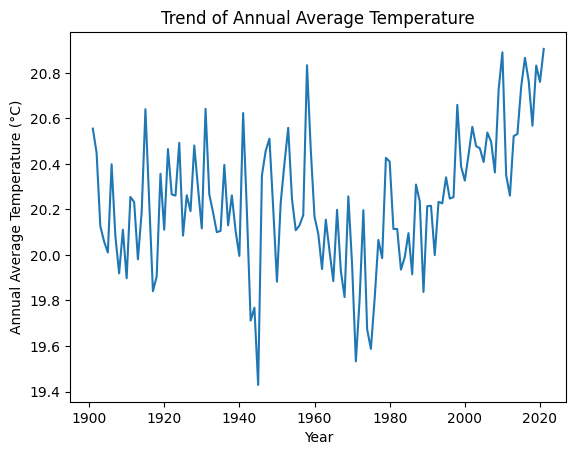

In [18]:
# Data Visualization
# Line chart of annual average temperature
plt.plot(annual_avg_temp.index, annual_avg_temp.values)
plt.xlabel('Year')
plt.ylabel('Annual Average Temperature (°C)')
plt.title('Trend of Annual Average Temperature')
plt.show()

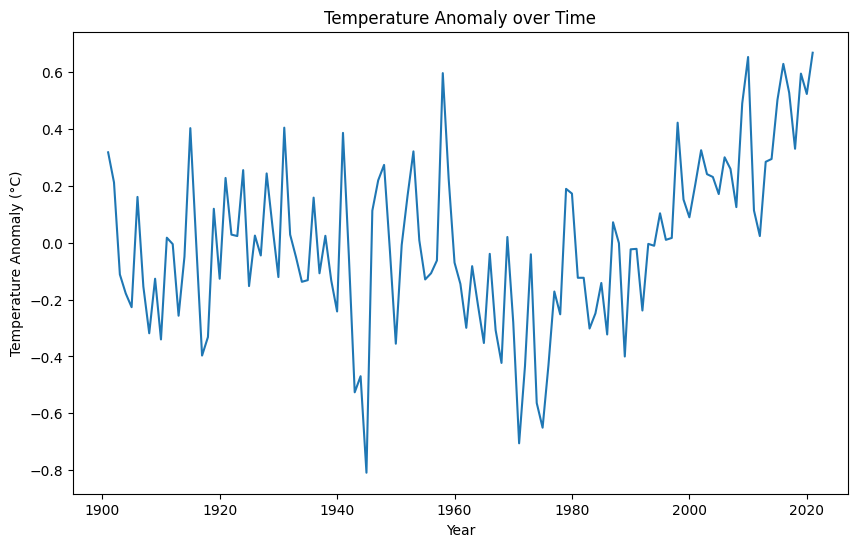

In [19]:
# Create a line plot of temperature anomaly over time
plt.figure(figsize=(10,6))
plt.plot(temp_anomaly.index, temp_anomaly.values)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Anomaly over Time')
plt.show()

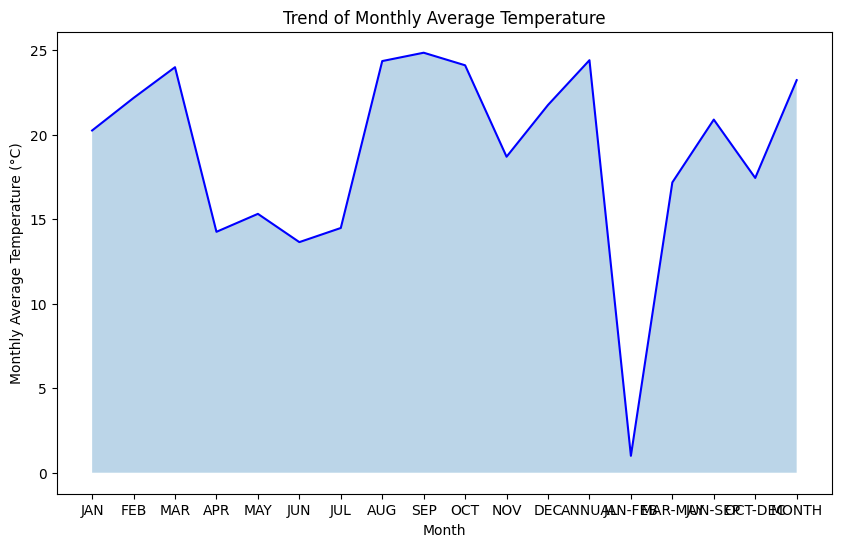

In [20]:
# Melt the dataframe to create a column for months
monthly_avg_temp = Temp_df.melt(id_vars=['YEAR'], var_name='Month', value_name='Temperature')

# Create a line chart of monthly average temperature
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_temp['Month'].unique(), monthly_avg_temp.groupby('Month')['Temperature'].mean().values, 'b-')
plt.fill_between(monthly_avg_temp['Month'].unique(), monthly_avg_temp.groupby('Month')['Temperature'].mean().values, alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Monthly Average Temperature (°C)')
plt.title('Trend of Monthly Average Temperature')
plt.show()

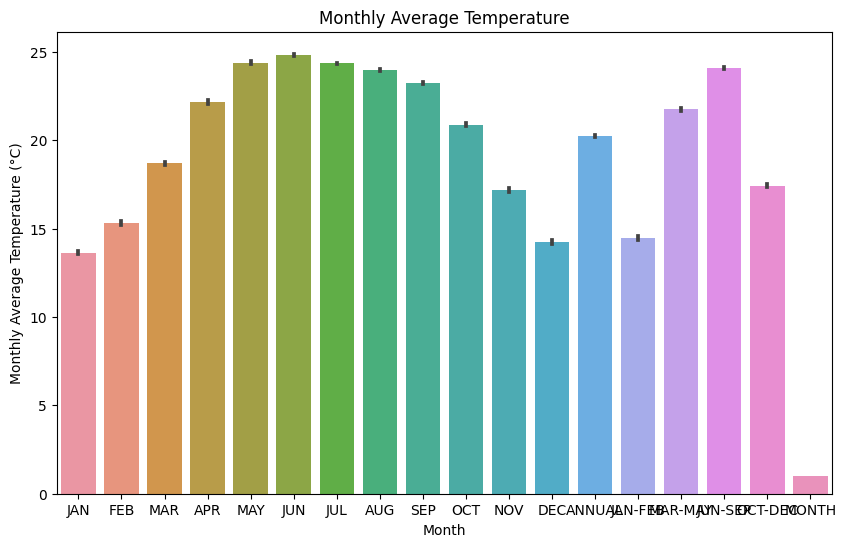

In [21]:
# Create a bar chart of monthly average temperature
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Temperature', data=monthly_avg_temp)
plt.xlabel('Month')
plt.ylabel('Monthly Average Temperature (°C)')
plt.title('Monthly Average Temperature')
plt.show()

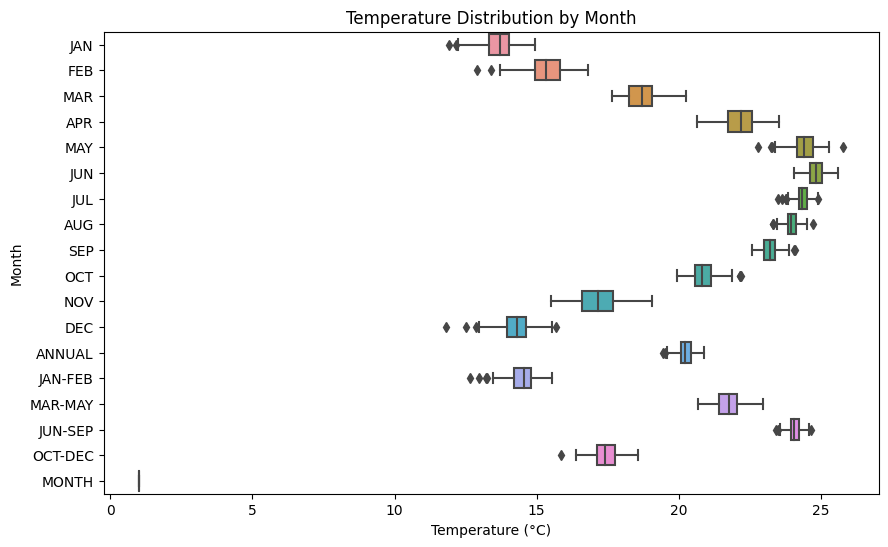

In [22]:
# Pivot the dataframe to create a column for months
Temp_df_pivot = Temp_df.melt(id_vars=['YEAR'], var_name='Month', value_name='Temperature')

# Create a boxplot of temperature distribution by month
plt.figure(figsize=(10,6))
sns.boxplot(data=Temp_df_pivot, x='Temperature', y='Month')
plt.xlabel('Temperature (°C)')
plt.ylabel('Month')
plt.title('Temperature Distribution by Month')
plt.show()

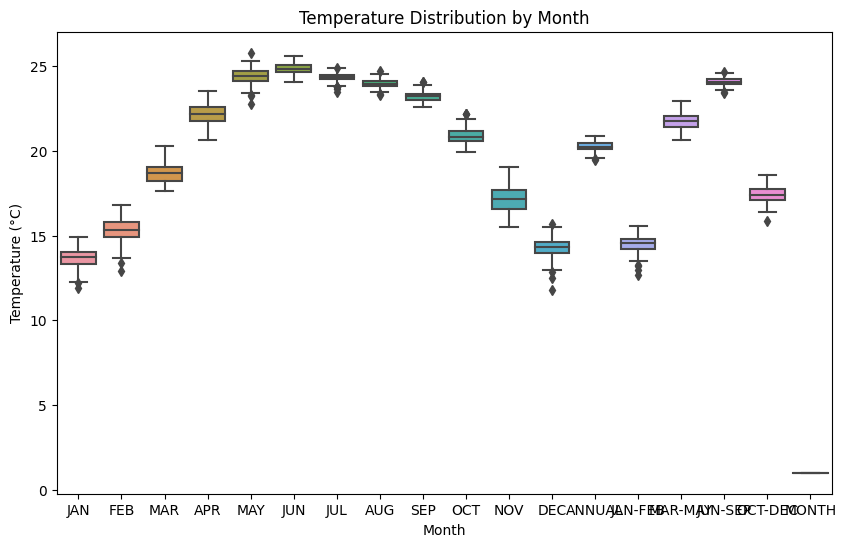

In [23]:
# Pivot the dataframe to create a column for months
Temp_df_pivot = Temp_df.melt(id_vars=['YEAR'], var_name='Month', value_name='Temperature')

# Create a boxplot of temperature distribution by month
plt.figure(figsize=(10,6))
sns.boxplot(data=Temp_df_pivot, x='Month', y='Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution by Month')
plt.show()

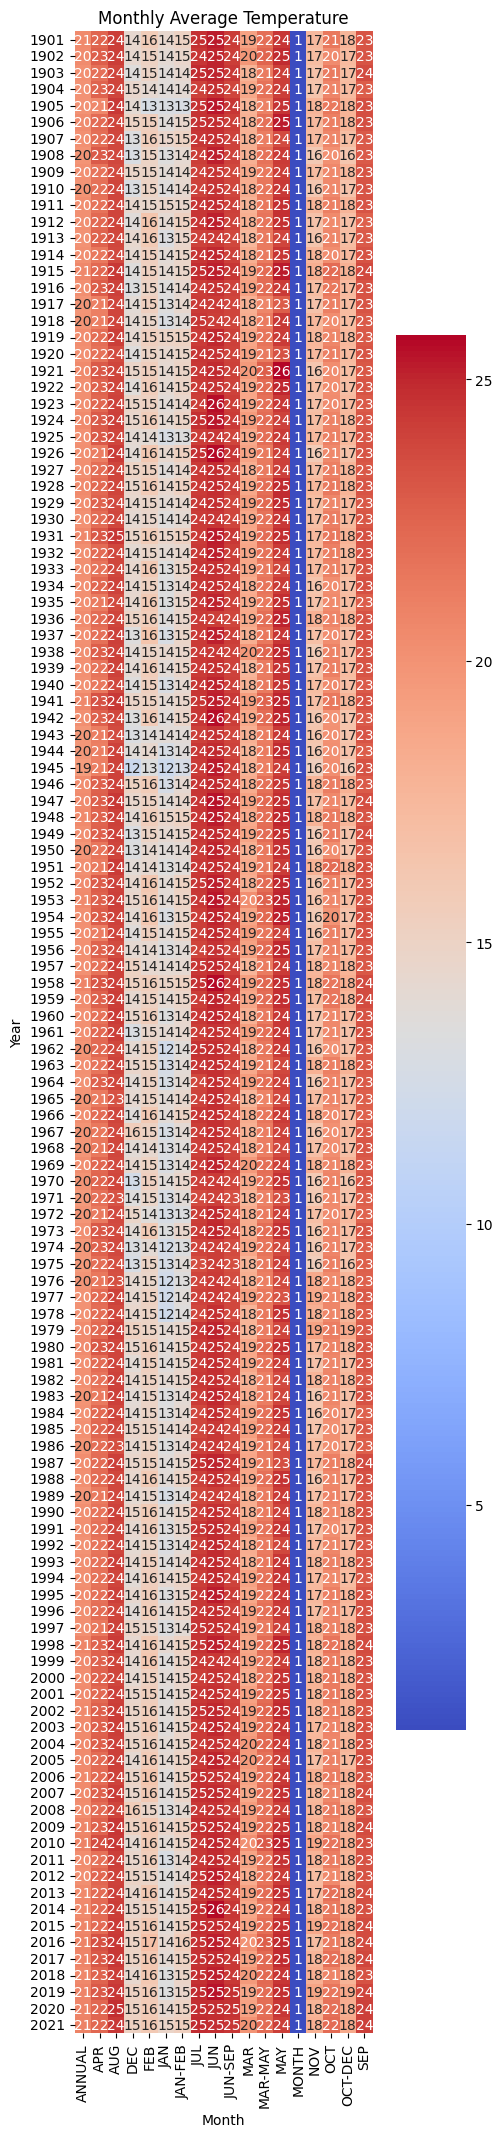

In [24]:
# Pivot the dataframe to create a matrix for the heatmap
monthly_avg_temp_pivot = monthly_avg_temp.pivot(index='YEAR', columns='Month', values='Temperature')

# Heatmap of monthly average temperature
plt.figure(figsize=(6,26))
sns.heatmap(monthly_avg_temp_pivot, annot=True, cmap='coolwarm', square=True)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly Average Temperature')
plt.show()

In [25]:
from sklearn.decomposition import PCA

# Pivot the dataframe to create a matrix for PCA
monthly_avg_temp_pivot = monthly_avg_temp.pivot(index='YEAR', columns='Month', values='Temperature')

# PCA analysis
pca = PCA(n_components=2)
monthly_avg_temp_pca = pca.fit_transform(monthly_avg_temp_pivot)
print(pca.explained_variance_ratio_)

[0.41475359 0.19400049]


In [26]:
from sklearn.manifold import TSNE

# Pivot the dataframe to create a matrix for TSNE
monthly_avg_temp_pivot = monthly_avg_temp.pivot(index='YEAR', columns='Month', values='Temperature')

# TSNE analysis
tsne = TSNE(n_components=2, perplexity=30)
monthly_avg_temp_tsne = tsne.fit_transform(monthly_avg_temp_pivot)
print(tsne.kl_divergence_)

0.4743288457393646


In [27]:
from sklearn.cluster import KMeans

# Pivot the dataframe to create a matrix for K-Means
monthly_avg_temp_pivot = monthly_avg_temp.pivot(index='YEAR', columns='Month', values='Temperature')

# K-Means clustering
kmeans = KMeans(n_clusters=5)  # Create a KMeans object with 5 clusters
monthly_avg_temp_kmeans = kmeans.fit_predict(monthly_avg_temp_pivot)  # Fit and predict the clusters
print(kmeans.inertia_)  # Print the inertia (sum of squared distances of samples to their closest cluster center)

258.99330391170236


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
from sklearn.preprocessing import StandardScaler

# Pivot the dataframe to create a matrix for standardization
monthly_avg_temp_pivot = monthly_avg_temp.pivot(index='YEAR', columns='Month', values='Temperature')

# Standardization
scaler = StandardScaler()  # Create a StandardScaler object
monthly_avg_temp_scaled = scaler.fit_transform(monthly_avg_temp_pivot)  # Fit and transform the data to have zero mean and unit variance
print(monthly_avg_temp_scaled)

[[ 1.06981027  0.50617868  0.76706471 ...  1.25612434  0.60098025
   0.02239928]
 [ 0.72654046  0.98110279  0.88812753 ... -0.92747404 -0.24411705
   0.09189447]
 [-0.3719229  -0.60197757 -0.24179214 ...  0.89918999 -0.54593751
   1.41230311]
 ...
 [ 2.03096571  1.28012908  1.57415018 ...  1.55007028  2.3112962
   2.3504882 ]
 [ 1.79067685  0.34787064  3.02690403 ...  2.11696601  1.64729118
   3.01069252]
 [ 2.27125457  0.2951013   1.65485873 ...  2.68386175  2.13020392
   2.94119733]]


In [29]:
print(monthly_avg_temp_scaled.shape)

(121, 18)


In [30]:
print(monthly_avg_temp_scaled[:5])

[[ 1.06981027  0.50617868  0.76706471  0.05318836  0.67964834  1.38414365
   1.23447179  1.12804513  1.26626923  0.98723357  0.5831583   0.57135575
   0.22455515  0.          0.34344919  1.25612434  0.60098025  0.02239928]
 [ 0.72654046  0.98110279  0.88812753  0.16253433 -0.20607811  0.71193261
   0.26691714  0.48331358  0.63905868  0.63985368  1.75192574  1.60742455
   1.02994094  0.         -0.06424229 -0.92747404 -0.24411705  0.09189447]
 [-0.3719229  -0.60197757 -0.24179214 -1.16523821 -0.65644749  0.17416377
  -0.33296674  2.07617975  0.54945717  1.20434601 -1.30082505 -0.98274745
  -0.36888701  0.         -0.68936923  0.89918999 -0.54593751  1.41230311]
 [-0.61221176  0.6820765  -0.28214641  0.4437097  -1.6172355   0.19096905
  -0.93285062 -1.29917951 -0.37642506 -0.96677835 -0.02739186  0.1239624
  -0.47485882  0.         -0.81167667 -0.23460148 -0.28435977 -1.26326177]
 [-0.78384666 -2.65998204  1.73556727 -0.227987   -3.59886077 -0.98540028
  -2.88731102  0.97634359  1.594808